In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


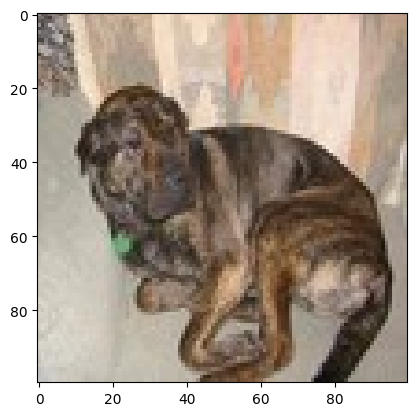

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [6]:
# model = Sequential()

# model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
# model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(32, (3,3), activation = 'relu'))
# model.add(MaxPooling2D((2,2)))


# model.add(Flatten())
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

# model = Sequential()

# # 1st Convolutional Layer
# model.add(Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)))
# model.add(MaxPooling2D((2,2)))

# # 2nd Convolutional Layer
# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))

# # 3rd Convolutional Layer
# model.add(Conv2D(256, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))

# # Flattening & Fully Connected Layers
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid')) 

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model = Sequential()

# First Conv Block
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2,2)))

# Second Conv Block
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Third Conv Block
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


In [8]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 556ms/step - accuracy: 0.5266 - loss: 0.6911
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 545ms/step - accuracy: 0.5388 - loss: 0.6859
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 533ms/step - accuracy: 0.6497 - loss: 0.6599
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 525ms/step - accuracy: 0.6330 - loss: 0.6404
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 589ms/step - accuracy: 0.6920 - loss: 0.5850


In [9]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.7260 - loss: 0.5224


[0.6148145794868469, 0.6524999737739563]

# Making predictions

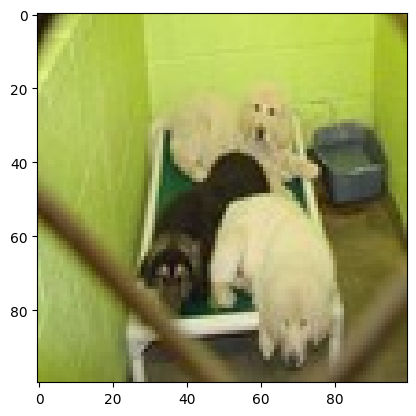

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Our model says it is a : dog


In [10]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

In [11]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7260 - loss: 0.5224
Test Accuracy: 65.25%


In [12]:
# Predict probabilities for test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert Y_test from one-hot encoding (if applicable) to categorical labels
Y_test_labels = np.argmax(Y_test, axis=1) if Y_test.shape[1] > 1 else Y_test.flatten()

# Calculate accuracy
accuracy = np.mean(y_pred == Y_test_labels)

print(f"Test Accuracy: {accuracy*100:.2f}%")
from sklearn.metrics import classification_report

# Create classification report
print(classification_report(Y_test_labels, y_pred, target_names=['dog', 'cat']))


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Test Accuracy: 50.00%
              precision    recall  f1-score   support

         dog       0.62      0.79      0.69       200
         cat       0.71      0.52      0.60       200

    accuracy                           0.65       400
   macro avg       0.66      0.65      0.65       400
weighted avg       0.66      0.65      0.65       400



In [13]:
# Applying Transfer learning model 

# Applying Transfer Learning using VGG16

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
import tensorflow as tf
for layer in base_model.layers[-4:]:  # Unfreeze last 4 layers
    layer.trainable = True

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 765ms/step - accuracy: 0.7528 - loss: 0.4816 - val_accuracy: 0.8900 - val_loss: 0.2583
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 767ms/step - accuracy: 0.9229 - loss: 0.1922 - val_accuracy: 0.8725 - val_loss: 0.2878
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 781ms/step - accuracy: 0.9530 - loss: 0.1318 - val_accuracy: 0.8400 - val_loss: 0.3501
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 887ms/step - accuracy: 0.9759 - loss: 0.0684 - val_accuracy: 0.8900 - val_loss: 0.2647
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 757ms/step - accuracy: 0.9826 - loss: 0.0387 - val_accuracy: 0.9025 - val_loss: 0.3692


In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 466ms/step - accuracy: 0.9210 - loss: 0.2901
Test Accuracy: 90.25%


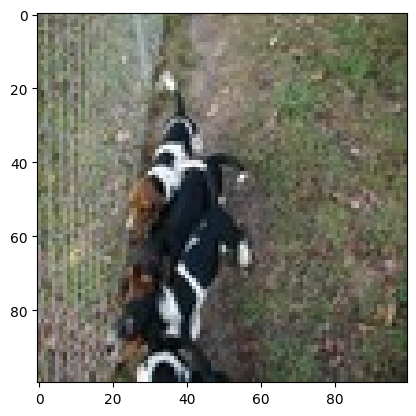

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Predicted label: Dog


In [17]:
idx = random.randint(0, len(X_test))
plt.imshow(X_test[idx])
plt.show()

y_pred = model.predict(X_test[idx].reshape(1, 100, 100, 3))
pred_label = "Cat" if y_pred > 0.5 else "Dog"

print("Predicted label:", pred_label)


In [18]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 830ms/step - accuracy: 0.9210 - loss: 0.2901
Test Accuracy: 90.25%
